In [13]:
import pandas as pd
import numpy as np
import paths
import nibabel as nib
from scipy.stats import pearsonr
from nilearn import plotting

In [2]:
exp_folder = paths.sample_derivatives / "cust_kmeans_dist-correlation_ttype-percentage_tvalue-15_k-4_ninits-50_activation-pos_n-481"
cap_paths = sorted(exp_folder.glob("CAP_*_z.nii"))
n_caps = len(cap_paths)
print(f"Found {n_caps} CAP files.")

Found 4 CAP files.


In [3]:
vectorized_caps = []
for cap_idx, cap_path in enumerate(cap_paths):
    print(f"Processing {cap_idx+1}/{n_caps}: {cap_path.name}")
    cap = nib.load(cap_path)
    cap_data = cap.get_fdata()
    vectorized_caps.append(cap_data.flatten())


Processing 1/4: CAP_01_z.nii
Processing 2/4: CAP_02_z.nii
Processing 3/4: CAP_03_z.nii
Processing 4/4: CAP_04_z.nii


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# compute cap pairwise correlation matrix
corr_matrix = np.zeros((n_caps, n_caps))
for i in range(n_caps):
    for j in range(i,n_caps):
            corr_matrix[i, j] = pearsonr(vectorized_caps[i], vectorized_caps[j])[0]

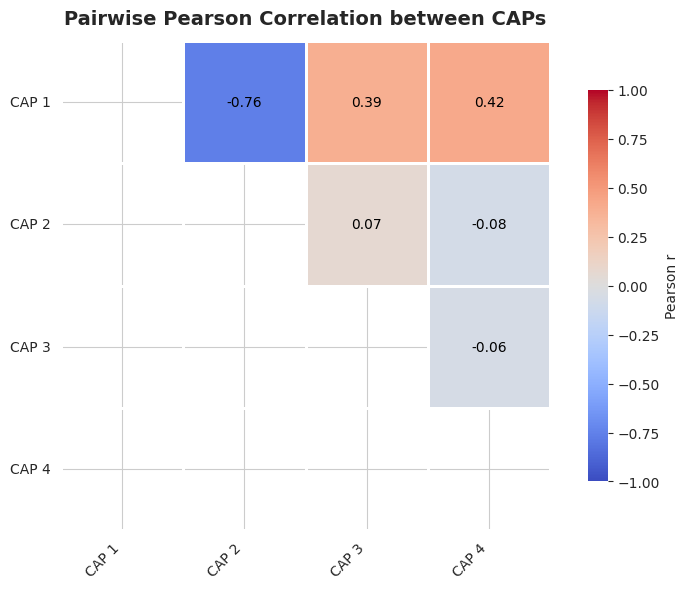

In [6]:
mask = np.tril(np.ones_like(corr_matrix, dtype=bool), k=0)
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.8,
    vmin=-1,
    vmax=1,
    cbar_kws={"shrink": 0.8, "label": "Pearson r"},
    xticklabels=[f"CAP {i+1}" for i in range(n_caps)],
    yticklabels=[f"CAP {i+1}" for i in range(n_caps)],
    annot_kws={"size": 10, "color": "black"},
)

plt.title("Pairwise Pearson Correlation between CAPs", fontsize=14, weight="bold", pad=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [8]:
preterm_folder = paths.sample_derivatives / "cust_kmeans_dist-correlation_ttype-percentage_tvalue-15_k-4_ninits-50_activation-pos_n-126"
term_folder = paths.sample_derivatives / "cust_kmeans_dist-correlation_ttype-percentage_tvalue-15_k-4_ninits-50_activation-pos_n-355"

In [9]:
preterm_cap_paths = sorted(preterm_folder.glob("CAP_*_z.nii"))
term_cap_path = sorted(term_folder.glob("CAP_*_z.nii"))

for term_cap, preterm_cap in zip(term_cap_path, preterm_cap_paths):
    term_cap_data = nib.load(term_cap).get_fdata().flatten()
    preterm_cap_data = nib.load(preterm_cap).get_fdata().flatten()
    r, p = pearsonr(term_cap_data, preterm_cap_data)
    print(f"{term_cap.name} vs {preterm_cap.name}: Pearson r = {r:.4f}, p-value = {p:.4e}")


CAP_01_z.nii vs CAP_01_z.nii: Pearson r = 0.9777, p-value = 0.0000e+00
CAP_02_z.nii vs CAP_02_z.nii: Pearson r = 0.9152, p-value = 0.0000e+00
CAP_03_z.nii vs CAP_03_z.nii: Pearson r = 0.3938, p-value = 0.0000e+00
CAP_04_z.nii vs CAP_04_z.nii: Pearson r = -0.2193, p-value = 0.0000e+00


CAP_01_z.nii vs CAP_01_z.nii: Pearson r = 0.9777, p-value = 0.0000e+00
CAP_02_z.nii vs CAP_02_z.nii: Pearson r = 0.9152, p-value = 0.0000e+00
CAP_03_z.nii vs CAP_03_z.nii: Pearson r = 0.3938, p-value = 0.0000e+00
CAP_04_z.nii vs CAP_04_z.nii: Pearson r = -0.2193, p-value = 0.0000e+00


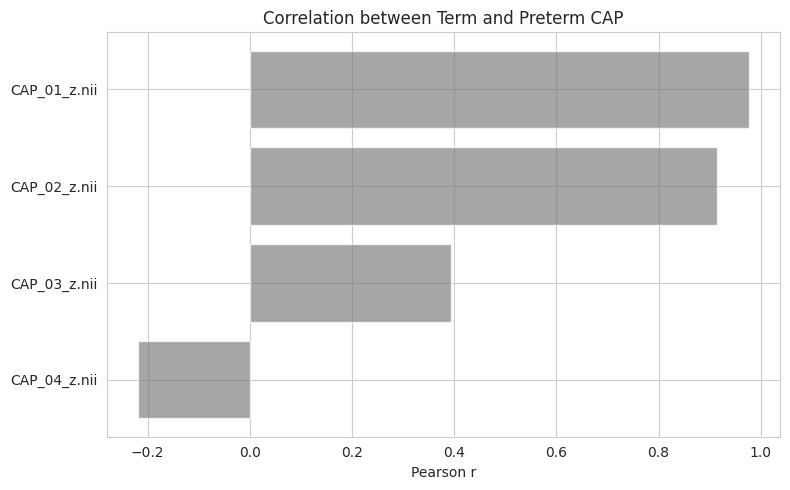

In [26]:
preterm_cap_paths = sorted(preterm_folder.glob("CAP_*_z.nii"))
term_cap_paths = sorted(term_folder.glob("CAP_*_z.nii"))

results = []

for term_cap, preterm_cap in zip(term_cap_paths, preterm_cap_paths):
    term_cap_data = nib.load(term_cap).get_fdata().flatten()
    preterm_cap_data = nib.load(preterm_cap).get_fdata().flatten()
    r, p = pearsonr(term_cap_data, preterm_cap_data)
    results.append((term_cap.name, r, p))
    print(f"{term_cap.name} vs {preterm_cap.name}: Pearson r = {r:.4f}, p-value = {p:.4e}")

# Reverse order for inverted labels
labels = [name for name, _, _ in results][::-1]
r_values = [r for _, r, _ in results][::-1]

plt.figure(figsize=(8, 5))
plt.barh(range(len(r_values)), r_values, color='gray', alpha=0.7)
plt.yticks(range(len(labels)), labels, rotation=0, ha='right')
plt.xlabel("Pearson r")
plt.title("Correlation between Term and Preterm CAP")
plt.tight_layout()
plt.show()


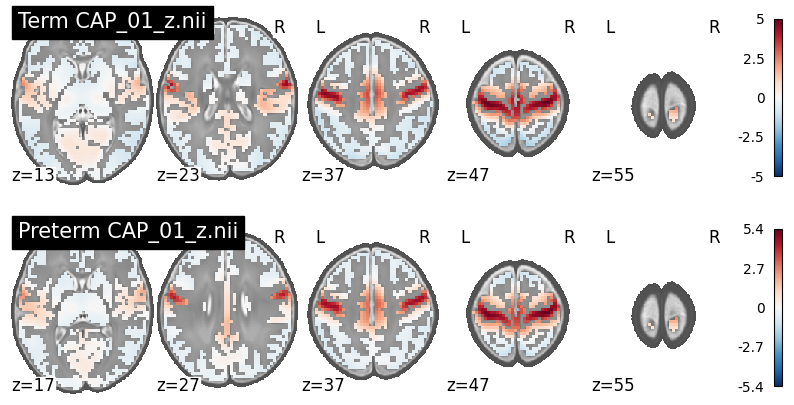

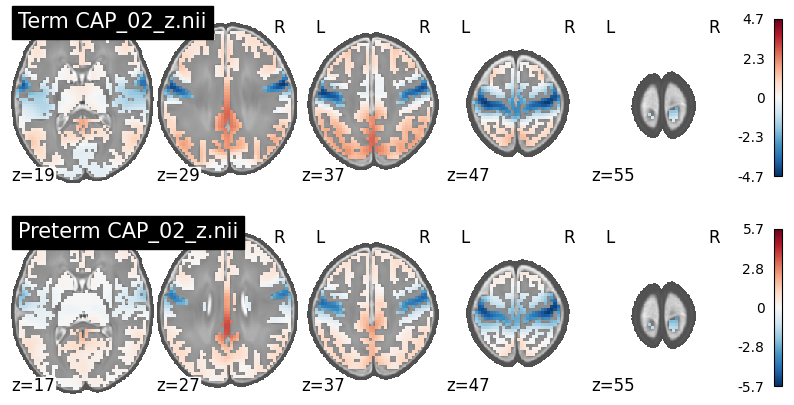

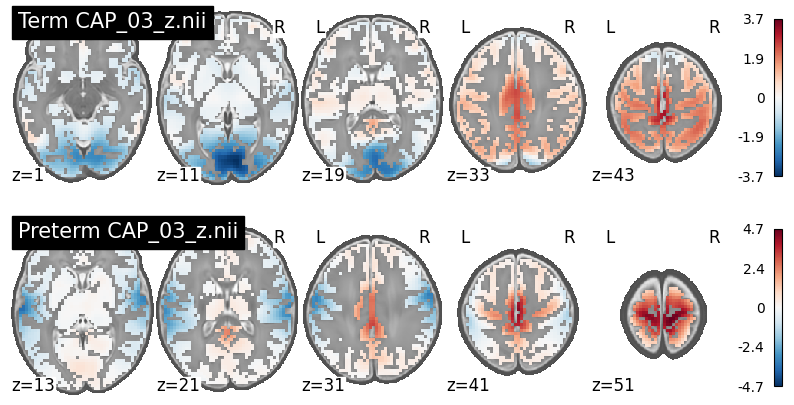

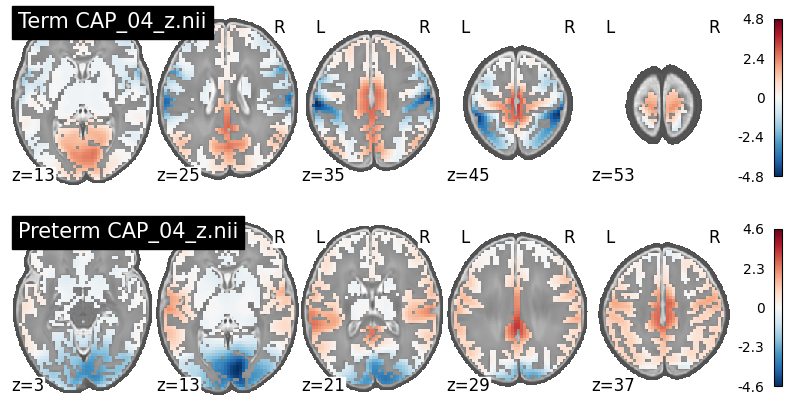

In [21]:
import matplotlib.pyplot as plt
from nilearn import plotting
import nibabel as nib

for term_cap, preterm_cap in zip(term_cap_paths, preterm_cap_paths):
    term_cap_img = nib.load(term_cap)
    preterm_cap_img = nib.load(preterm_cap)

    fig, axes = plt.subplots(2, 1, figsize=(10, 5))  # side by side (columns)

    display1 = plotting.plot_stat_map(
        term_cap_img,
        title=f"Term {term_cap.name}",
        bg_img=paths.ext40Template,
        black_bg=False,
        display_mode="z",
        cut_coords=5,
        colorbar=True,
        axes=axes[0],
        figure=fig,
    )

    display2 = plotting.plot_stat_map(
        preterm_cap_img,
        title=f"Preterm {preterm_cap.name}",
        bg_img=paths.ext40Template,
        black_bg=False,
        display_mode="z",
        cut_coords=5,
        colorbar=True,
        axes=axes[1],
        figure=fig,
    )

    plt.show()
